In [110]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [111]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 5220-A98C

 Directory of C:\Users\abc\OneDrive\Desktop\excelr\Assignments\multi_linear_regression

25/08/2022  17:32    <DIR>          .
25/08/2022  17:32    <DIR>          ..
25/08/2022  16:19    <DIR>          .ipynb_checkpoints
24/08/2022  08:16             2,436 50_Startups.csv
25/08/2022  17:32           524,099 Assignment_5_multiplelinearregression_nihalinamdar.ipynb
24/08/2022  08:16               468 proble_statement(50_startups).txt
24/08/2022  08:16             1,752 Toyota Corolla.txt
24/08/2022  08:16           224,041 ToyotaCorolla.csv
               5 File(s)        752,796 bytes
               3 Dir(s)  20,789,313,536 bytes free


In [112]:
data_su=pd.read_csv("50_Startups.csv")
data_su

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [113]:
data1=data_su.rename({'R&D Spend':'rnds','Administration':'adm','Marketing Spend':'mkts'},axis=1)
data1.head(5)

,rnds,adm,mkts,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [114]:
data1.describe()

,rnds,adm,mkts,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [115]:
data1.corr()

,rnds,adm,mkts,Profit
rnds,1.000000,0.241955,0.724248,0.972900
adm,0.241955,1.000000,-0.032154,0.200717
mkts,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


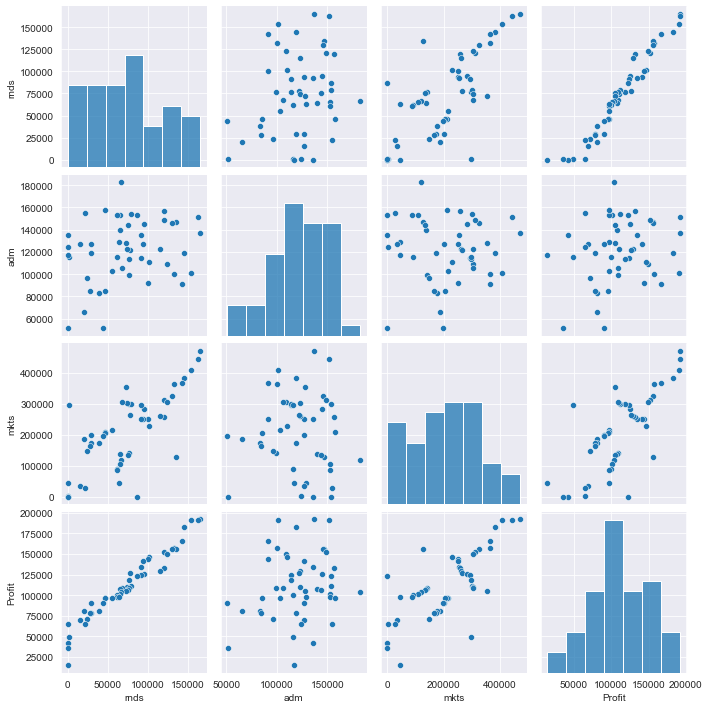

In [116]:
sns.set_style(style='darkgrid')
sns.pairplot(data1)


# model building

In [117]:
model=smf.ols("Profit~rnds+adm+mkts",data=data1).fit()

# Model testing

In [118]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 25 Aug 2022   Prob (F-statistic):           4.53e-30
Time:                        17:34:10   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
rnds           0.8057      0.045     17.846      0.000       0.715       0.897
adm           -0.0268      0.051     -0.526      0.602      -0.130       0.076
mkts           0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [119]:
# Here pvalues of adm and mkts is high which will prove the null hypothesis (Features are dependent on each other) true 
# and the first assumption will contradict.

# SLR and MLR for adm and mkts

In [120]:
slr_adm=smf.ols("Profit~adm",data=data1).fit()

In [121]:
slr_adm.pvalues

Intercept    0.003824
adm          0.162217
dtype: float64

In [122]:
slr_mkt=smf.ols("Profit~mkts",data=data1).fit()
slr_mkt.pvalues

Intercept    4.294735e-10
mkts         4.381073e-10
dtype: float64

In [123]:
mlr_adm_mkt=smf.ols("Profit~adm+mkts",data=data1).fit()
mlr_adm_mkt.pvalues

Intercept    2.589341e-01
adm          1.729198e-02
mkts         9.727245e-11
dtype: float64

# Model Validation

# Collinearity check

After checking dependencies between features, subsetting with ind and dep features we can remove dependencies.

Consider {x1,x2,x3,x4,x5}

VIF is high--> {x3 x4 x5} (here, adm and mkts) VIF is low --> {x1 x2}

You will keep VIF low subsets always --> {x3 x1 x2} {x4 x1 x2} {x5 x1 x2} {x3 x4 x1 x2} {x4 x5 x1 x2} {x5 x3 x1 x2}

Now,criteria to choose one of the best set from above is pvalue should be on the lower side and we should have r**2 high

In [124]:
rsq_r=smf.ols("rnds~adm+mkts",data=data1).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("adm~rnds+mkts",data=data1).fit().rsquared
vif_a=1/(1-rsq_r)

rsq_m=smf.ols("mkts~rnds+adm",data=data1).fit().rsquared
vif_m=1/(1-rsq_r)

d1={'Variables':['rnds', 'adm','mkts'],'VIF':[vif_r,vif_a,vif_m]}
df1=pd.DataFrame(d1)
df1

,Variables,VIF
0,rnds,2.468903
1,adm,2.468903
2,mkts,2.468903


In [125]:
# VIF lesser than 20 claiming independence of each other ie non collinear

# Residual Analysis

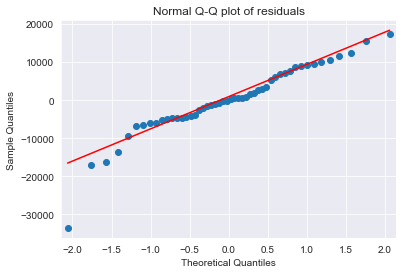

In [126]:
sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")

plt.show()


In [127]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

# Test for Homoscedasticity

In [128]:
def standard_values(vals):return (vals-vals.mean())/vals.std() #normal to std normal conversion by z=(x-mu)/std dev(sigma)

<function matplotlib.pyplot.show(close=None, block=None)>

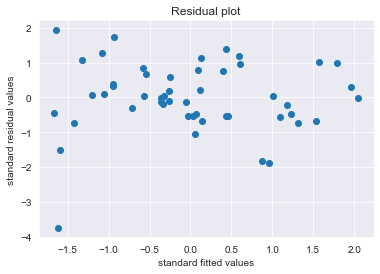

In [129]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title("Residual plot")
plt.xlabel('standard fitted values')
plt.ylabel('standard residual values')
plt.show

eval_env: 1


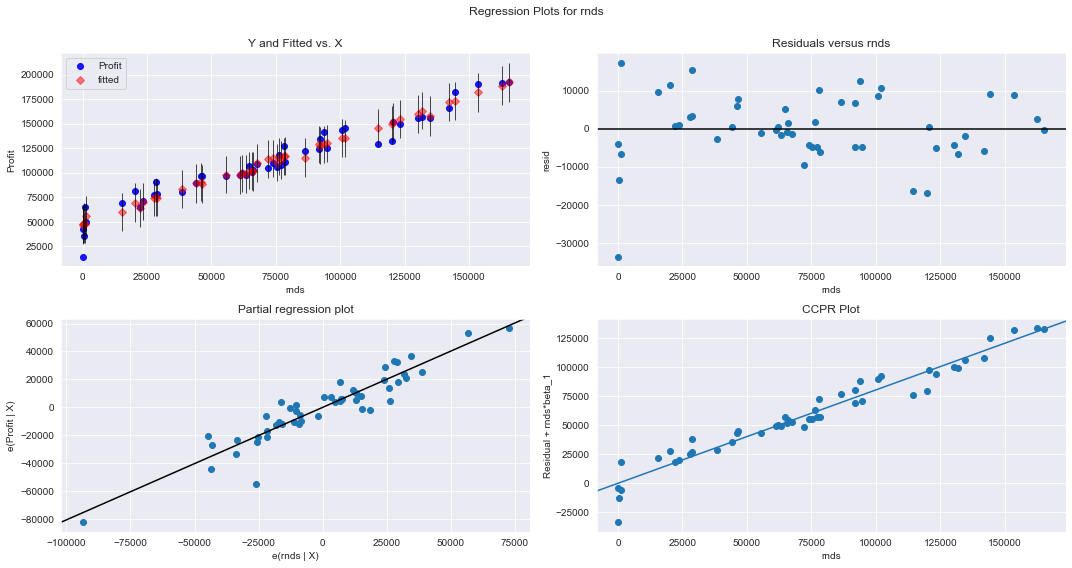

In [130]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'rnds',fig=fig)
plt.show()

eval_env: 1


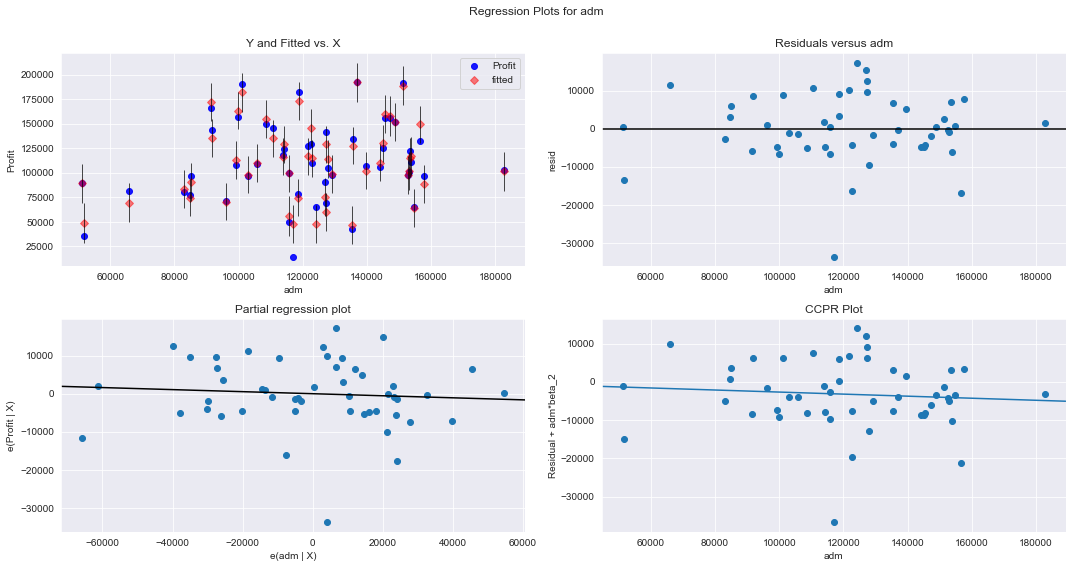

In [131]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'adm',fig=fig)
plt.show()

eval_env: 1


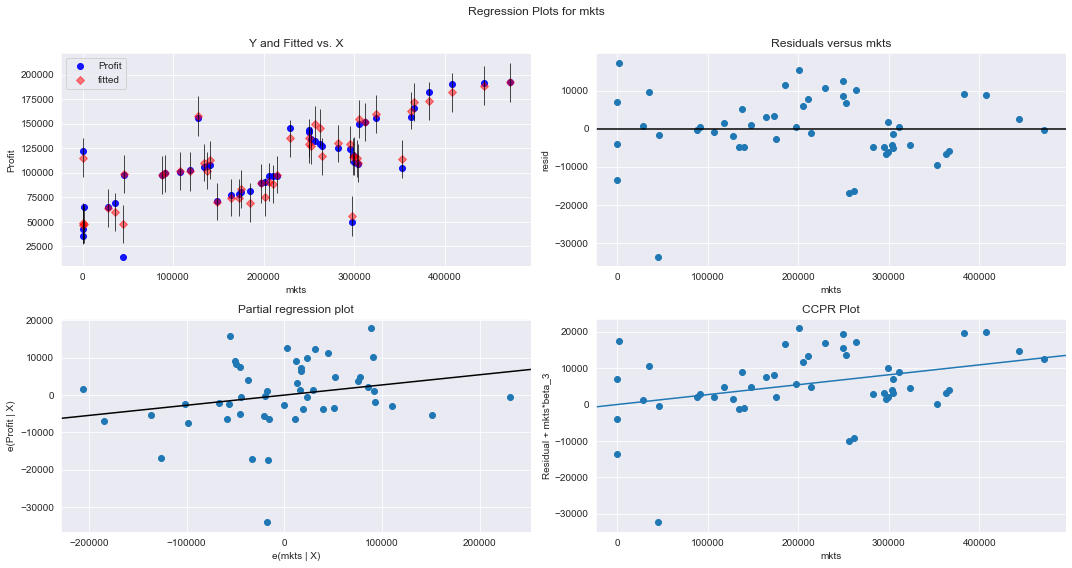

In [132]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'mkts',fig=fig)
plt.show()

# Outliers detection and removal

# Cook's distance

In [133]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

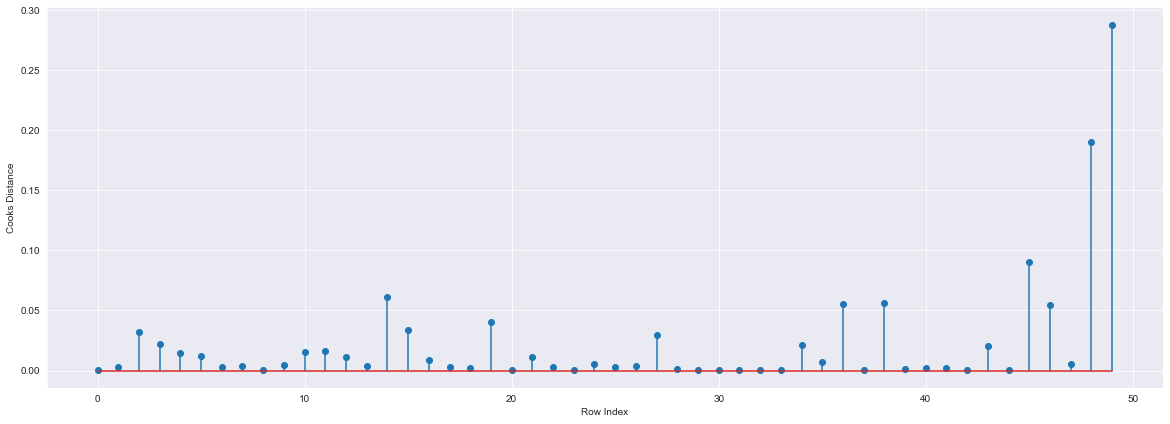

In [134]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [135]:
np.argmax(c), np.max(c)

(49, 0.28808229275432634)

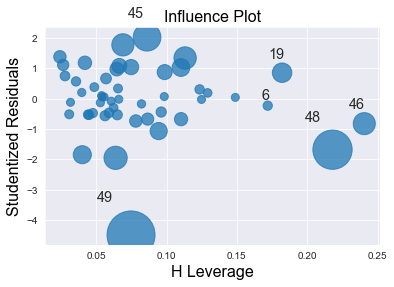

In [136]:
influence_plot(model)
plt.show()

In [137]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=data1.shape[1]
n=data1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In [138]:
data1[data1.index.isin([49])] 

,rnds,adm,mkts,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


# Model Improvement

In [139]:
data2=data1.drop(data1.index[[49]],axis=0).reset_index(drop=True)
data2

,rnds,adm,mkts,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Final model

In [109]:
model2=smf.ols("Profit~rnds+adm+mkts",data=data2).fit()

In [163]:
while model2.rsquared < 0.99:
    for c in [np.max(c)>1]:
        model2=smf.ols("Profit~rnds+adm+mkts",data=data2).fit()
        (c,_)=model2.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        data2=data2.drop(data2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        data2
    else:
        final_model=smf.ols("Profit~rnds+adm+mkts",data=data2).fit()
        final_model.rsquared
        print("Hence model accuracy has been improved to",final_model.rsquared)

In [164]:
final_model.rsquared

0.9882757054424702

In [165]:
data2

,rnds,adm,mkts,State,Profit
0,142107.34,91391.77,366168.42,Florida,166187.94
1,131876.90,99814.71,362861.36,New York,156991.12
2,130298.13,145530.06,323876.68,Florida,155752.60
3,120542.52,148718.95,311613.29,New York,152211.77
4,123334.88,108679.17,304981.62,California,149759.96
5,91992.39,135495.07,252664.93,California,134307.35
6,94657.16,145077.58,282574.31,New York,125370.37
7,91749.16,114175.79,294919.57,Florida,124266.90
8,76253.86,113867.30,298664.47,California,118474.03
9,67532.53,105751.03,304768.73,Florida,108733.99


# Predictions

In [166]:
new_data=pd.DataFrame({'rnds':70000,'adm':90000,'mkts':140000},index=[0])
new_data

,rnds,adm,mkts
0,70000,90000,140000


In [167]:
final_model.predict(new_data)

0    104858.729408
dtype: float64

In [168]:
# Automatic Prediction of Price with 90.02% accurcy
pred_y=final_model.predict(data2)
pred_y

0     165589.539700
1     158552.826483
2     156789.000710
3     149524.698853
4     150122.356712
5     126598.769555
6     130104.785747
7     127878.387928
8     117298.757074
9     111329.242429
10    110009.916133
11    102331.717613
12    109661.804131
13    103462.767086
14    101874.612012
15     97655.794577
16     97872.919535
17     96858.382686
18     98654.449007
19     93583.600868
20     91186.568204
21     88571.938968
22     84521.312916
23     78528.002935
24     76670.262623
25     73237.524757
26     68075.710756
dtype: float64

In [169]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.988276
